In [1]:
import joblib
import warnings
import sys
sys.path.append('../src/utils')

# Core
from utils_functions import *
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format
warnings.simplefilter('ignore')
%load_ext autoreload
%autoreload 2

In [2]:
# Features seleccionados previamente
selected_features = np.loadtxt('../models/selected_features.txt', dtype=str)

# Modelo final
final_model = joblib.load('../models/TunnedRandomForestClassifier.pkl')

# Lectura de los subsets
X_train = pd.read_csv('../data/processed/X_train.csv')[selected_features]
X_val = pd.read_csv('../data/processed/X_val.csv')[selected_features]
X_test = pd.read_csv('../data/processed/X_test.csv')[selected_features]

y_train = pd.read_csv('../data/processed/y_train.csv')
y_val = pd.read_csv('../data/processed/y_val.csv')
y_test = pd.read_csv('../data/processed/y_test.csv')

In [3]:
from sklearn.metrics import log_loss

# Evaluar el mejor modelo en el conjunto de entrenamiento
y_pred_train = final_model.predict_proba(X_train)[:, 1]
train_log_loss = log_loss(y_train, y_pred_train)

# Evaluar el mejor modelo en el conjunto de validación
y_pred_val = final_model.predict_proba(X_val)[:, 1]
val_log_loss = log_loss(y_val, y_pred_val)

# Evaluar el mejor modelo en el conjunto de prueba
test_pred_val = final_model.predict_proba(X_test)[:, 1]
test_log_loss = log_loss(y_test, test_pred_val)

print('=== RESULTADOS FINALES ===')
print(f'Log-loss train set: {100*train_log_loss:0.2f}%')
print(f'Log-loss validation set: {100*val_log_loss:0.2f}%')
print(f'Log-loss test set: {100*test_log_loss:0.2f}%')

=== RESULTADOS FINALES ===
Log-loss train set: 40.96%
Log-loss validation set: 39.21%
Log-loss test set: 39.35%


In [4]:
from sklearn.metrics import roc_auc_score

# Evaluar el mejor modelo en el conjunto de entrenamiento
y_pred_train = final_model.predict_proba(X_train)[:, 1]
train_roc_auc = roc_auc_score(y_train, y_pred_train)

# Evaluar el mejor modelo en el conjunto de validación
y_pred_val = final_model.predict_proba(X_val)[:, 1]
val_roc_auc = roc_auc_score(y_val, y_pred_val)

# Evaluar el mejor modelo en el conjunto de prueba
y_pred_test = final_model.predict_proba(X_test)[:, 1]
test_roc_auc = roc_auc_score(y_test, y_pred_test)

print('=== RESULTADOS FINALES ===')
print(f'ROC-AUC train set: {100*train_roc_auc:0.2f}%')
print(f'ROC-AUC validation set: {100*val_roc_auc:0.2f}%')
print(f'ROC-AUC test set: {100*test_roc_auc:0.2f}%')

=== RESULTADOS FINALES ===
ROC-AUC train set: 88.38%
ROC-AUC validation set: 88.90%
ROC-AUC test set: 87.51%


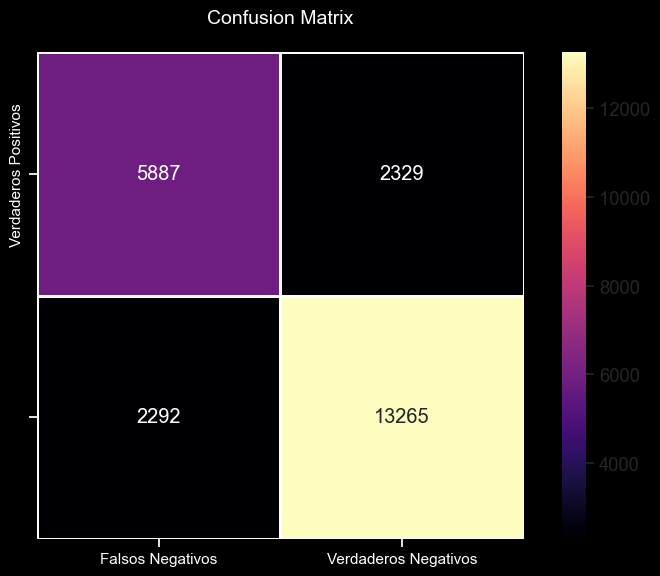

In [5]:
# Matriz de confusión
cnf_matrix(y_true=y_train,
           y_pred=y_pred_train)

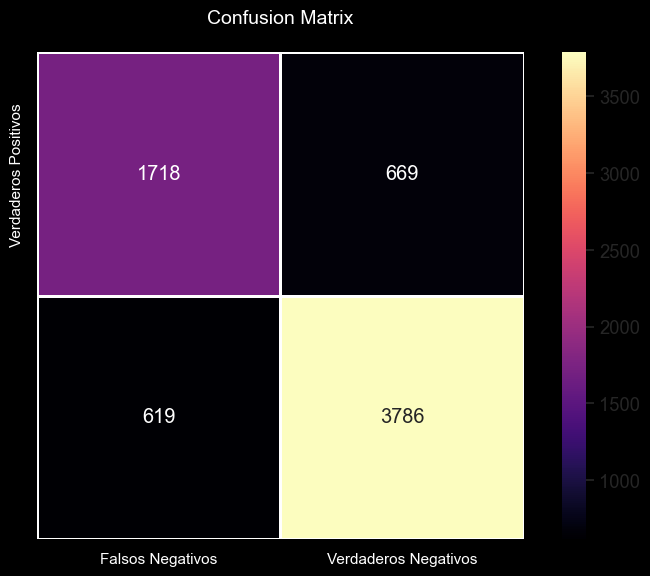

In [6]:
# Matriz de confusión
cnf_matrix(y_true=y_val,
           y_pred=y_pred_val)

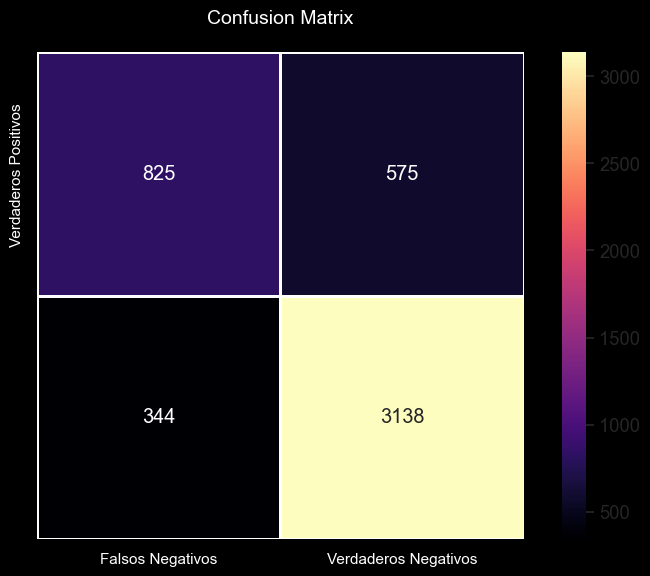

In [7]:
# Matriz de confusión
cnf_matrix(y_true=y_test,
           y_pred=y_pred_test)